<a href="https://colab.research.google.com/github/PrudhviNarayanKorupolu/Korupolu_inclass_4/blob/main/Korupolu_In_class_exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (40 points in total, 10/20/2021)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (15 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [10]:
# Load libraries
import numpy as np
import pandas as pd
import nltk
import random
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [11]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import LatentDirichletAllocation

In [12]:
df = pd.read_csv("/content/dataset.csv", header=0)


In [13]:
df.head()

Text  sentiment    result
0  TRENDING: New Yorkers encounter empty supermar...         -1  Negative
1  When I couldn't find hand sanitizer at Fred Me...          1   Neutral
2  Find out how you can protect yourself and love...          1  Positive
3  #Panic buying hits #NewYork City as anxious sh...         -1   Neutral
4  #toiletpaper #dunnypaper #coronavirus #coronav...          0   Neutral

In [14]:
df.isnull().sum()

Text            0
sentiment       0
result       2168
dtype: int64

In [15]:
df.sentiment.value_counts()

-1    1633
 1    1546
 0     619
Name: sentiment, dtype: int64

In [16]:
myData = df.loc[:,'Text'].tolist()
print(type(myData))
print(len(myData))

<class 'list'>
3798


In [17]:
myData[:10]

['TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1',
 "When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",
 'Find out how you can protect yourself and loved ones from #coronavirus. ?',
 '#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?\r\r\n\r\r\nhttps://t.co/IASiReGPC4\r\r\n\r\r\n#QAnon #QAnon2018 #QAnon2020 \r\r\n#Election2020 #CDC https://t.co/29isZOewxu',
 '#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News  #Corvid19 #7NewsMelb #dunnypapergate #Costco    One we

In [18]:


textCounter = 0
while textCounter > len(myData):
  myData[textCounter] = re.sub(r'http\S+', '', myData[textCounter])
  textCounter = textCounter + 1

In [19]:
myData[:1]

['TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1']

In [20]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
stopwords = stopwords.words('english')

In [22]:
def tokenization_and_stemming(text):
    # Remove punctuation characters and numbers
    text = re.sub(r"[^a-zA-Z]", " ", text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Create a instance of stem class
    stemmer = SnowballStemmer("english")
    
    clean_data = []
    for word in tokens:
        clean_token = stemmer.stem(word).lower().strip()
        if clean_token not in stopwords:
            clean_data.append(clean_token)
 
    return clean_data

In [23]:
myData[1]

"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY"

In [24]:
tokenization_and_stemming(myData[1])

['find',
 'hand',
 'sanit',
 'fred',
 'meyer',
 'turn',
 'amazon',
 'pack',
 'purel',
 'check',
 'coronavirus',
 'concern',
 'drive',
 'price',
 'https',
 'co',
 'ygbipbflmi']

In [25]:
LDA = LatentDirichletAllocation(n_components=5)

In [26]:
tf_lda = CountVectorizer(
    max_df=0.99,
    max_features=500,
    min_df=0.01,
    tokenizer=tokenization_and_stemming,
    ngram_range=(1,1))


tf_matrix_lda = tf_lda.fit_transform(myData) 


print ("In total, there are {} reviews and {} terms.".format(
    str(tf_matrix_lda.shape[0]), str(tf_matrix_lda.shape[1])
))

In total, there are 3798 reviews and 349 terms.


In [27]:
print(tf_matrix_lda.shape)


(3798, 349)


In [28]:
lda_feature_name = tf_lda.get_feature_names()


In [29]:
lda_output = LDA.fit_transform(tf_matrix_lda)
print(lda_output.shape)

(3798, 5)


In [30]:
topic_word = LDA.components_
print(topic_word.shape)

(5, 349)


In [31]:
topics_names = ["Topic" + str(i) for i in range(LDA.n_components)]

# Index names
doc_names = ["Doc" + str(i) for i in range(len(myData))]

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topics_names, index=doc_names)

# Get dominant topic for each document
df_document_topic['topic'] = np.argmax(df_document_topic.values, axis=1)

df_document_topic.head(10)

Topic0  Topic1  Topic2  Topic3  Topic4  topic
Doc0    0.59    0.13    0.01    0.01    0.25      0
Doc1    0.77    0.02    0.17    0.02    0.02      0
Doc2    0.03    0.03    0.86    0.03    0.03      2
Doc3    0.46    0.51    0.01    0.01    0.01      1
Doc4    0.16    0.62    0.01    0.01    0.20      1
Doc5    0.25    0.01    0.71    0.01    0.01      2
Doc6    0.58    0.03    0.34    0.03    0.03      0
Doc7    0.02    0.02    0.93    0.02    0.02      2
Doc8    0.01    0.27    0.26    0.45    0.01      3
Doc9    0.31    0.02    0.02    0.39    0.27      3

In [32]:
df_document_topic['topic'].value_counts().to_frame()


topic
1    908
3    842
4    805
0    659
2    584

In [33]:

# Topic-word matrix
df_topics_words = pd.DataFrame(LDA.components_)

# Column and index
df_topics_words.columns = tf_lda.get_feature_names()
df_topics_words.index = topics_names

df_topics_words.head()

abl     affect     afford  ...  yesterday        yet          z
Topic0   0.201889   8.118690   0.201889  ...   6.135390   0.204115   0.210971
Topic1  17.675486   0.203646  31.933375  ...   9.623244   0.204280   1.338640
Topic2   0.218043  17.760176  10.007048  ...   5.807776  22.136030  29.839668
Topic3  35.602931  19.716189   8.656335  ...   0.203453   6.902483   0.203533
Topic4   0.301651   0.201298   0.201353  ...  21.230138  12.553093  11.407189

[5 rows x 349 columns]

In [34]:

# Print top n keywords for each topic
def print_topics_words(tfidf_model, lda_model, n_words):
    words = np.array(tfidf_model.get_feature_names())
    topics_words = []
    # For each topic, we have words weight
    for topics_words_weights in lda_model.components_:
        top_words = topics_words_weights.argsort()[::-1][:n_words]
        topics_words.append(words.take(top_words))
    return topics_words

topics_keywords = print_topics_words(tfidf_model=tf_lda, lda_model=LDA, n_words=20)        

df_topics_words = pd.DataFrame(topics_keywords)
df_topics_words.columns = ['Word '+str(i) for i in range(df_topics_words.shape[1])]
df_topics_words.index = ['Topic '+str(i) for i in range(df_topics_words.shape[0])]
df_topics_words

Word 0   Word 1 Word 2       Word 3  ... Word 16 Word 17 Word 18  Word 19
Topic 0     co    https  covid  coronavirus  ...    paid  custom       w   pandem
Topic 1   food    stock  covid          buy  ...    item      co   https    donat
Topic 2  covid    price     co        https  ...      na   world  corona  compani
Topic 3   shop    covid  onlin        peopl  ...    week    time     day   school
Topic 4  store  groceri  covid  coronavirus  ...   paper   today    went     line

[5 rows x 20 columns]

In [36]:
df_document_topic["sentiment"] = df.result.values

In [37]:
df_document_topic.groupby('topic')['sentiment'].value_counts()

topic  sentiment
0      Negative     113
       Neutral      107
       Positive      20
1      Neutral      192
       Negative     150
       Positive      32
2      Neutral      157
       Negative     128
       Positive      31
3      Negative     152
       Neutral      151
       Positive      21
4      Neutral      194
       Negative     143
       Positive      39
Name: sentiment, dtype: int64

In the above cell output, Topic 1 shows that it has high ratio of negative reviews.
Topic 2 has high neutral review rate.

## (2) (15 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [38]:
# Write your code here

import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
def load_data(path,file_name):
    df = pd.read_csv(file_name, header=0)
    print("Total Number of Documents:",len(df))
    documents_list = df.loc[:,'Text'].tolist()
    return documents_list

In [40]:
document_list=load_data("","dataset.csv")
print(document_list)

Total Number of Documents: 3798
['TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1', "When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY", 'Find out how you can protect yourself and loved ones from #coronavirus. ?', '#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?\r\r\n\r\r\nhttps://t.co/IASiReGPC4\r\r\n\r\r\n#QAnon #QAnon2018 #QAnon2020 \r\r\n#Election2020 #CDC https://t.co/29isZOewxu', '#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News  #Corvid19 #7NewsMelb #dunn

In [42]:
def preprocess_data(doc_set):
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        raw = re.sub(r'http\S+', '', raw)
        raw = re.sub(r"[^a-zA-Z]", " ", raw)
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [43]:
def prepare_corpus(doc_clean):
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [44]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [45]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [46]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.legend(("coherence_values"), loc='best')
    plt.show()

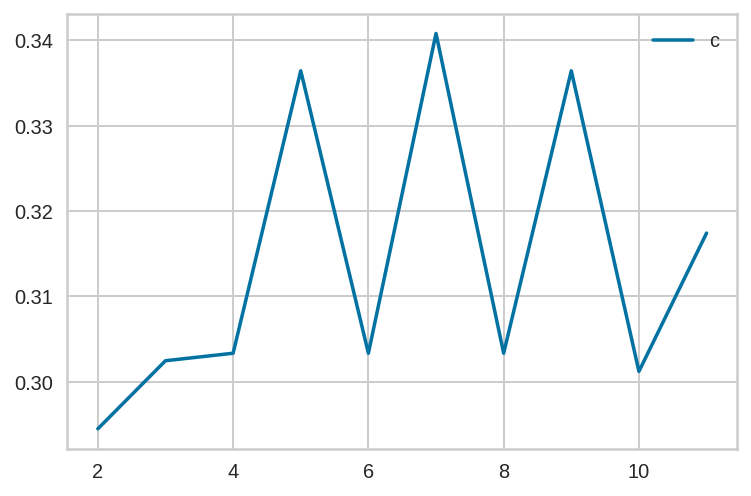

In [50]:
start,stop,step=2,12,1
clean_text=preprocess_data(document_list)
plot_graph(clean_text,start,stop,step)

In [49]:
number_of_topics=5
words=10
document_list=load_data("","dataset.csv")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

Total Number of Documents: 3798
[(0, '0.639*"covid" + 0.306*"food" + 0.284*"coronaviru" + 0.256*"store" + 0.194*"stock" + 0.191*"groceri" + 0.174*"peopl" + 0.131*"amp" + 0.118*"buy" + 0.117*"shop"'), (1, '-0.621*"food" + 0.412*"store" + -0.378*"stock" + 0.320*"groceri" + 0.292*"covid" + -0.113*"panic" + -0.111*"amp" + -0.110*"buy" + -0.097*"coronaviru" + -0.082*"need"'), (2, '-0.592*"covid" + 0.492*"store" + 0.383*"coronaviru" + 0.328*"groceri" + -0.214*"supermarket" + -0.159*"price" + 0.091*"retail" + 0.085*"peopl" + 0.085*"go" + 0.080*"amp"'), (3, '-0.489*"shop" + -0.481*"coronaviru" + -0.445*"onlin" + 0.283*"store" + 0.245*"food" + 0.241*"groceri" + 0.125*"stock" + -0.116*"amp" + 0.094*"paper" + -0.092*"price"'), (4, '0.501*"coronaviru" + -0.481*"peopl" + -0.311*"shop" + -0.242*"amp" + 0.239*"stock" + -0.232*"panic" + -0.232*"buy" + -0.211*"onlin" + 0.184*"price" + 0.135*"covid"')]


## (3) (10 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

### Write your answer here (no code needed for this question)
In topic modeling, LSA is used to create a matrix with terms and documents.Latent Dirichlet Allocation (LDA) is a process that takes the text of a document and categorizes it according to a specific topic. This procedure does not output the same documents as LSA. To find the optimal number of topics in multiple LDA models, the one with the highest coherence value is selected. Latent Semantic Analysis and Latent Dirichlet Allocation are commonly used for dealing with NLP issues. They can be easily seen in the output. The simplest way to implement LSA is by combining the document term matrix decomposition with the algorithm. It produces better results than LDA in terms of accuracy, simplicity, and speed. In addition, it uses the term frequency instead of the word count to determine the weights. 